<a href="https://colab.research.google.com/github/shahina-darion/DarionPlay/blob/main/house_prise_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of dataset: (20640, 8)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


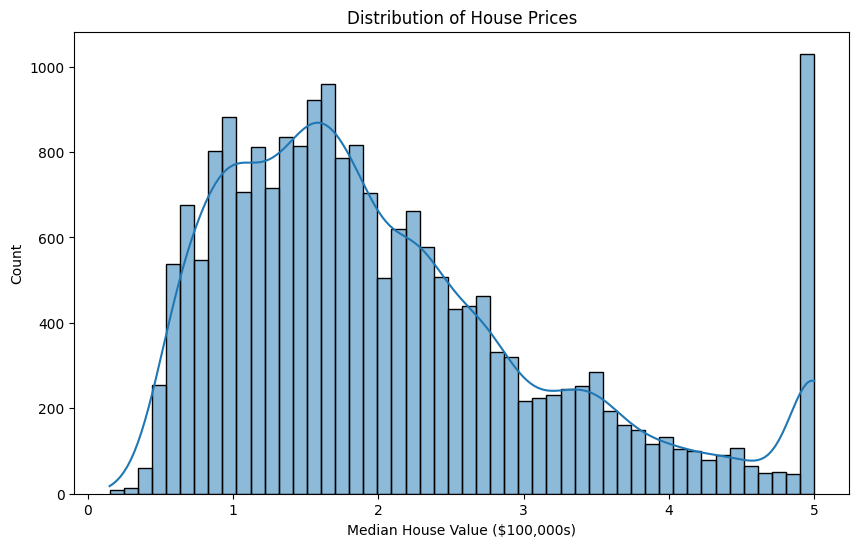

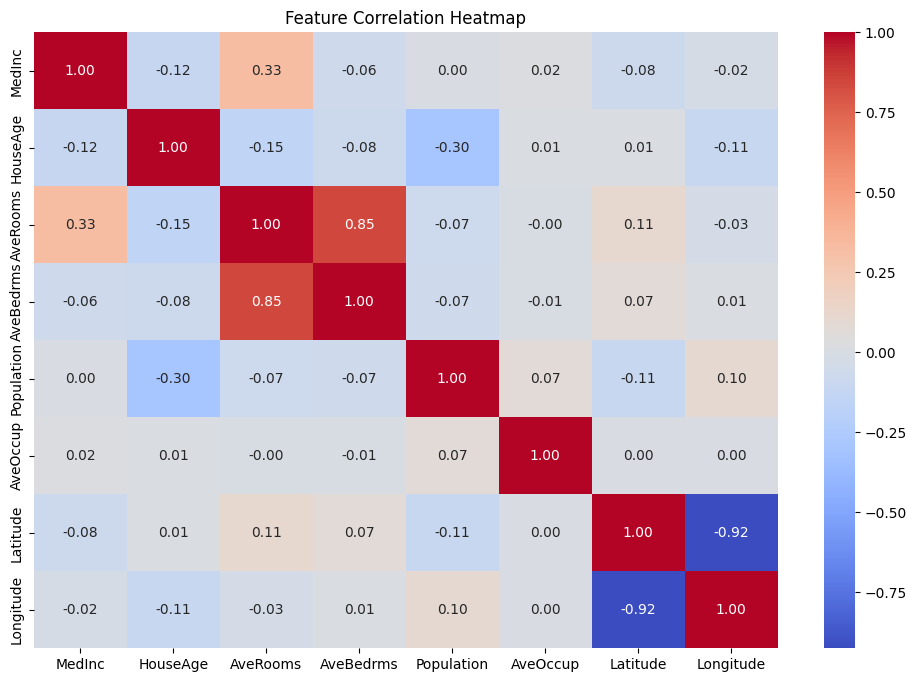


✅ Linear Regression Results:
RMSE: 0.75
R² Score: 0.58


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4101 - mae: 0.8415 - val_loss: 0.4305 - val_mae: 0.4618
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4561 - mae: 0.4833 - val_loss: 0.4145 - val_mae: 0.4539
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4286 - mae: 0.4666 - val_loss: 0.4286 - val_mae: 0.4401
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3736 - mae: 0.4365 - val_loss: 0.3647 - val_mae: 0.4176
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3539 - mae: 0.4226 - val_loss: 0.3924 - val_mae: 0.4200
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3526 - mae: 0.4174 - val_loss: 0.3426 - val_mae: 0.3970
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3354 - mae: 0.4050 - val_loss: 0.3479 - val_mae: 0.3925
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3224 - mae: 0.3951 - val_loss: 0.3298 - val_mae: 0.3852
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

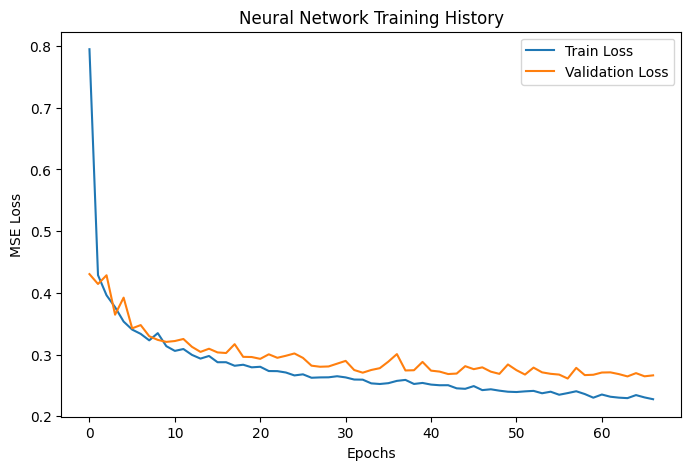

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

🏡 Predicted House Price for sample: $415951.22


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Install dependencies if needed
# !pip install scikit-learn tensorflow matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LinearRegression

# -------------------------
# 1. Load Dataset
# -------------------------
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # median house value in $100,000s

print("Shape of dataset:", X.shape)
print(X.head())

# -------------------------
# 2. Exploratory Data Analysis (EDA)
# -------------------------
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Median House Value ($100,000s)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# -------------------------
# 3. Train-Test Split & Scaling
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 4. Baseline: Linear Regression
# -------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n✅ Linear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

# -------------------------
# 5. Neural Network Model
# -------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# -------------------------
# 6. Evaluate Neural Network
# -------------------------
y_pred_nn = model.predict(X_test_scaled).flatten()

mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("\n✅ Neural Network Results:")
print(f"RMSE: {rmse_nn:.2f}")
print(f"R² Score: {r2_nn:.2f}")

# -------------------------
# 7. Training History Plot
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Neural Network Training History")
plt.legend()
plt.show()

# -------------------------
# 8. Example Prediction
# -------------------------
sample = np.array([[8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23]])
sample_scaled = scaler.transform(sample)
pred_price = model.predict(sample_scaled)[0][0]

print(f"\n🏡 Predicted House Price for sample: ${pred_price*100000:.2f}")
